# Regression task

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

random sampling

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sehriyarmemmedli/turboaz-cars-project")

print("Path to dataset files:", path)

df = pd.read_csv(path + '/cars.csv')

# looking for data size
print(f'shape: {df.shape}')

# dropping duplicates (makes up a significant amount of data)
df.drop_duplicates(subset=['car_rel_url_x'], keep='last', inplace=True)

# looking at data again after duplicate removal
print(f'shape after dropping duplicates on car_rel_url_x column: {df.shape}')

# even after reducing the data size almost 4 times, it is still huge (~150_000 rows)
# to speed up the process, it is favored to work with random sample of data, ~60%
df = df.sample(90_000)

# checking shape again
print(f'last shape: {df.shape}')

Path to dataset files: /root/.cache/kagglehub/datasets/sehriyarmemmedli/turboaz-cars-project/versions/1
shape: (653721, 56)
shape after dropping duplicates on car_rel_url_x column: (154030, 56)
last shape: (90000, 56)


In [ ]:
# first look at data

df.head()

,id_x,car_rel_url_x,datetime_scrape,name,price_x,currency_x,datetime_product,city,day,hour,...,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Yürüş,Ötürücü,Şəhər,car_details_id_y,car_rel_url,extra_info
346028,67485dac-3681-403a-b50d-9357e07278f2,/autos/8664817-porsche-cayenne,2024-11-01 20:15:10.331183,Porsche Cayenne,34000.0,$,"Bakı, dünən 11:45",bakı,01.11.2024,11:45,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,157 000 km,Tam,Bakı,df72221e-821d-4856-8aa3-c8300d217f14,/autos/8664817-porsche-cayenne,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
299228,afc473a1-2de4-4c7b-9504-0c60c5e6e635,/autos/8866978-mercedes-gl-500-4matic,2024-10-26 20:15:08.783535,Mercedes GL 500 4MATIC,50000.0,AZN,"Bakı, dünən 22:43",bakı,26.10.2024,22:43,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,7,160 000 km,Tam,Bakı,a6af326a-f54a-4bb4-a1bc-d02daf7b00e1,/autos/8866978-mercedes-gl-500-4matic,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
634201,fce56b00-91c5-414b-a98d-04e438d62c0d,/autos/9029665-bmw-520,2025-01-01 20:15:23.101242,BMW 520,78500.0,$,"Bakı, dünən 17:20",bakı,01.01.2025,17:20,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,4 000 km,Arxa,Bakı,4e7f4efa-fe3b-41d8-a18f-1f01d424d097,/autos/9029665-bmw-520,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
497167,d9203598-6437-48a3-b3a1-fadc919dc69c,/autos/8965653-toyota-land-cruiser,2024-11-22 20:15:10.892301,Toyota Land Cruiser,28900.0,$,"Gəncə, dünən 14:44",gəncə,22.11.2024,14:44,...,Avtomat,"Vuruğu yoxdur, rənglənib",Xeyr,7,147 727 km,Tam,Gəncə,c5d5dfc1-4b13-4e89-bb20-9e46b027ef26,/autos/8965653-toyota-land-cruiser,Yüngül lehimli disklər* ABS* Lyuk* Mərkəzi qap...
652266,0f0c85ac-a0d5-4cb0-85d9-b26644c2aa96,/autos/8969766-lexus-gs-430,2025-01-05 20:15:21.051803,Lexus GS 430,19800.0,AZN,"Bakı, dünən 11:03",bakı,05.01.2025,11:03,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,223 500 km,Arxa,Bakı,14061453-35ef-4402-81b3-6f94cb6216de,/autos/8969766-lexus-gs-430,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 346028 to 225517
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_x                      48000 non-null  object 
 1   car_rel_url_x             48000 non-null  object 
 2   datetime_scrape           48000 non-null  object 
 3   name                      48000 non-null  object 
 4   price_x                   48000 non-null  float64
 5   currency_x                48000 non-null  object 
 6   datetime_product          48000 non-null  object 
 7   city                      48000 non-null  object 
 8   day                       48000 non-null  object 
 9   hour                      48000 non-null  object 
 10  attributes                48000 non-null  object 
 11  production_year           48000 non-null  int64  
 12  engine_displacement_num   48000 non-null  float64
 13  engine_displacement_unit  47581 non-null  object 
 14  kilom

In [ ]:
# checking for null values

df.isna().sum().sort_values(ascending=False)

,0
Qəzalı,47879
spare_parts,47879
vin,44796
loan,36149
featured,35923
salon,33904
shop_name,33340
barter,31463
vip,26893
Sahiblər,16123


# Visualization

Visualization of data is important to know how the data is missing. By knowing the missing pattern of data, we can use it to our advantage, especially in data cleaning part by filling NaN values. There are several types of null values, such as missing at random `(MAR)`, not missing at random `(NMAR)`, and completely missing at random `(CMAR)`.

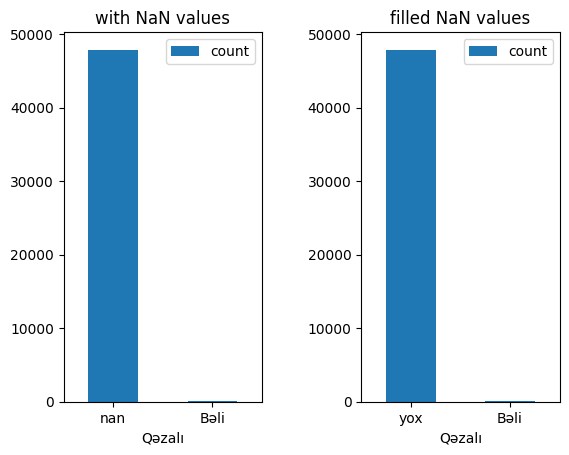

In [ ]:
# in this case, data is missing because instead of giving an input of 'Yox', people simply ignored this column, meaning that
# null values in this case represent 'Yox'

plt.subplot(121)
df['Qəzalı'].value_counts(dropna=False).plot.bar()
plt.xticks(rotation=0)
plt.title('with NaN values')
plt.legend()


plt.subplot(122)
df['Qəzalı'].fillna(value='yox').value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('filled NaN values')
plt.legend()


plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()




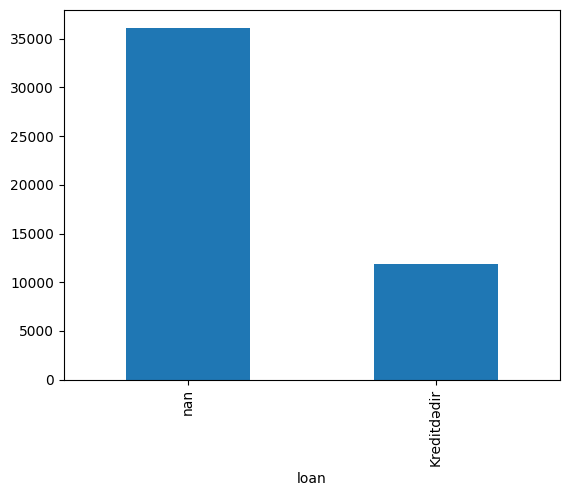

In [ ]:
# in this case, null values represent 'Kreditde deyil', not loan.

df['loan'].value_counts(dropna=False).plot.bar()

plt.show()

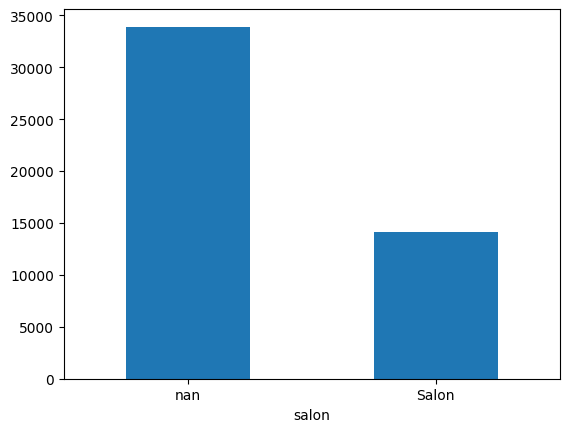

In [ ]:
# null values represent 'not salon'

df['salon'].value_counts(dropna=False).plot.bar(rot=0)

plt.show()

In [ ]:
df['shop_name'].value_counts(dropna=False).sort_values(ascending=False)

,count
shop_name,
NaN,453761
AvtoExpress Baku,7322
Lənkəran Avtomobil Mərkəzi,3991
Qoca Cars,2858
AutoFamily,2633
...,...
China Motors Azerbaijan,4
MINI Azərbaycan,2
094 Cars,2


In [ ]:
df['Sahiblər'].value_counts(dropna=False)

,count
Sahiblər,
NaN,221621
1,207016
2,128779
0,75150
3,17966
4 və daha çox,3189


In [ ]:
df['Hansı bazar üçün yığılıb'].value_counts(dropna=False).sort_values(ascending=False)

,count
Hansı bazar üçün yığılıb,
NaN,189505
Rəsmi diler,118333
Avropa,105315
Amerika,103217
Koreya,61449
Yaponiya,19123
Çin,18496
Digər,18148
Rusiya,14496


<Axes: title={'center': 'count of Yerlərin sayı'}, xlabel='Yerlərin sayı'>

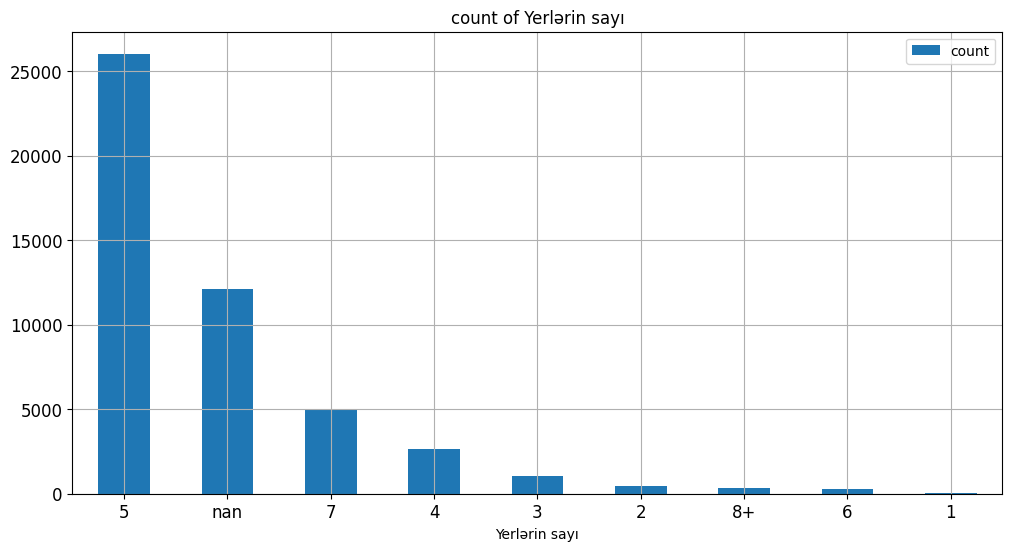

In [ ]:
df['Yerlərin sayı'].value_counts(dropna=False).sort_values(ascending=False)\
.plot.bar(grid=True, figsize=(12, 6), xlabel='Yerlərin sayı',
          style='plotly',rot=0, fontsize=12,
          title='count of Yerlərin sayı',
          legend=True)

In [ ]:
df['engine_displacement_unit'].value_counts(dropna=False).sort_values(ascending=False)

,count
engine_displacement_unit,
L,647933
NaN,5788


In [ ]:
df['kilometrage_unit'].value_counts(dropna=False).sort_values(ascending=False)

,count
kilometrage_unit,
km,647933
NaN,5788


In [ ]:
df['Vəziyyəti'].value_counts(dropna=False).sort_values(ascending=False)

,count
Vəziyyəti,
"Vuruğu yoxdur, rənglənməyib",615492
"Vuruğu yoxdur, rənglənib",31768
"Vuruğu var, rənglənib",3586
"Vuruğu var, rənglənməyib",2872
NaN,3


In [ ]:
df['Model'].value_counts(dropna=False).sort_values(ascending=False)

,count
Model,
Sorento,23185
Elantra,19004
Santa Fe,17858
Range Rover,16857
Sonata,16042
...,...
GSX-R 600,1
K9,1
3577,1


In [ ]:
df['Şəhər'].value_counts(dropna=False).sort_values(ascending=False)

,count
Şəhər,
Bakı,537681
Sumqayıt,47849
Gəncə,14142
Lənkəran,6347
Xırdalan,5424
...,...
Xocalı,1
Zəngilan,1
Liman,1


In [ ]:
df['Buraxılış ili'].value_counts(dropna=False).sort_values(ascending=False)

,count
Buraxılış ili,
2024,73340
2015,55094
2014,46582
2016,40181
2017,33783
...,...
1955,2
1938,2
1959,1


In [ ]:
df['Marka'].value_counts(dropna=False).sort_values(ascending=False)

,count
Marka,
Mercedes,90830
Hyundai,85968
Toyota,75167
Kia,67029
BMW,54432
...,...
Dadi,1
Vauxhall,1
Xin Kai,1


In [ ]:
df['Ban növü'].value_counts(dropna=False).sort_values(ascending=False)

,count
Ban növü,
Sedan,277955
"Offroader / SUV, 5 qapı",225026
"Hetçbek, 5 qapı",43094
Liftbek,22629
"Universal, 5 qapı",18337
Furqon,16803
Minivan,10056
Yük maşını,7835
"Offroader / SUV, 3 qapı",6402


In [ ]:
df['Mühərrik'].value_counts(dropna=False).sort_values(ascending=False)

,count
Mühərrik,
2.0 L/184 a.g./Dizel,19936
2.0 L/245 a.g./Benzin,13508
2.0 L/150 a.g./Benzin,10594
2.0 L / 184 a.g. / Dizel,9898
3.0 L/340 a.g./Benzin,8806
...,...
2.3 L/118 a.g./Benzin,1
2.0 L/265 a.g./Dizel,1
0.6 L/10 a.g./Benzin,1


In [ ]:
df['Ötürücü'].value_counts(dropna=False).sort_values(ascending=False)

,count
Ötürücü,
Ön,317025
Tam,187234
Arxa,149118


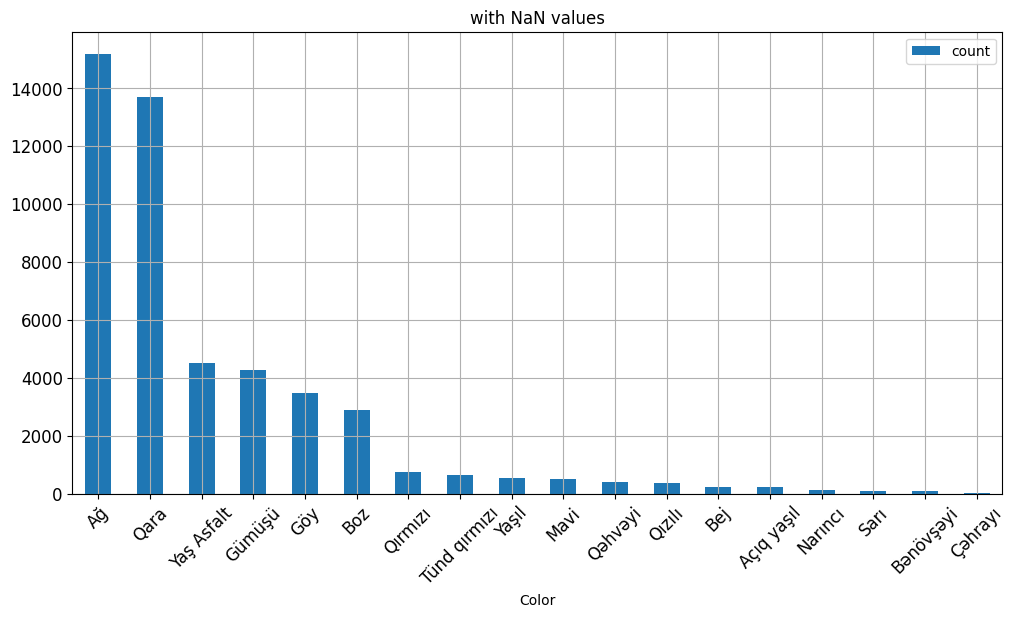

In [ ]:
df['Rəng'].value_counts(dropna=False).plot.bar(rot=45, title='with NaN values', legend='count',
                                               figsize=(12, 6), grid=True, style='ggplot', fontsize=12,
                                               xlabel='Color')

plt.show()

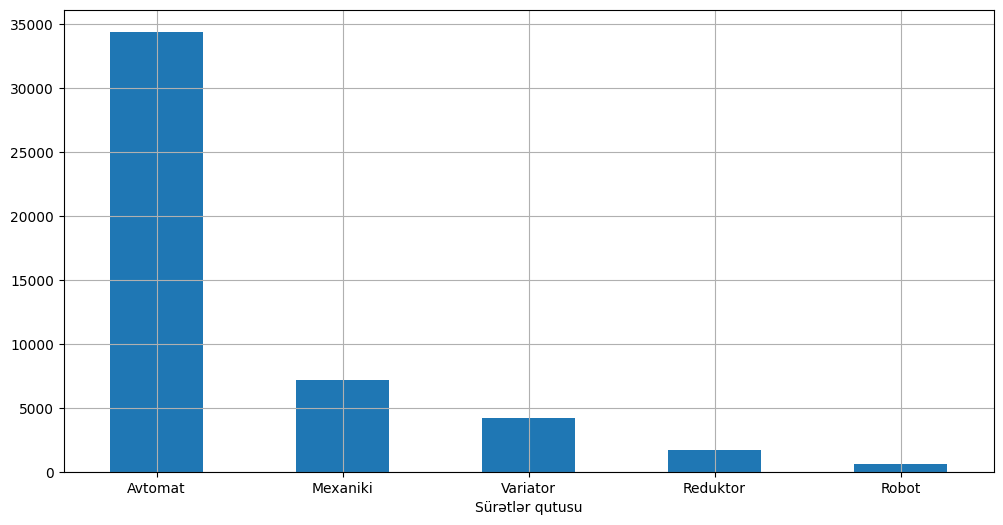

In [ ]:
df['Sürətlər qutusu'].value_counts(dropna=False).sort_values(ascending=False).plot.bar(rot=0, grid=True, figsize=(12, 6))
plt.show()

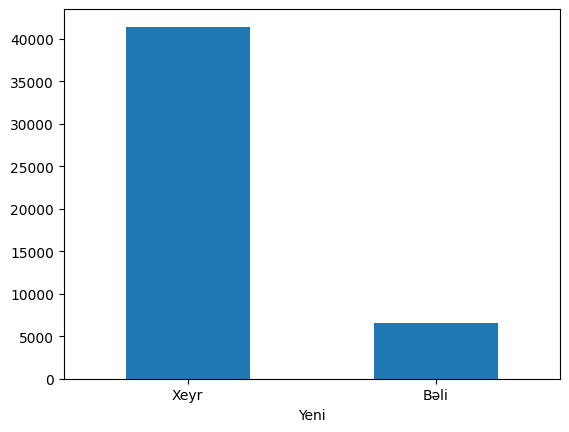

In [ ]:
df['Yeni'].value_counts(dropna=False).sort_values(ascending=False).plot.bar(rot=0)
plt.show()

In [ ]:
df['Yürüş'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
Yürüş,
0 km,87968
250 000 km,4561
200 000 km,3684
300 000 km,3531
220 000 km,3282
180 000 km,3273
170 000 km,3233
150 000 km,3231


In [ ]:
df.loc[:, ['price_y']].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
price_y,
23500.0,5967
21500.0,5601
22500.0,5521
26500.0,4940
28500.0,4845
24500.0,4740
23900.0,4654
25500.0,4601


In [ ]:
df['currency_x'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
currency_x,
AZN,465269
$,182221
€,5887


In [ ]:
df['datetime_product'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
datetime_product,
"Bakı, dünən 12:00",1346
"Bakı, dünən 11:24",1269
"Bakı, dünən 12:01",1192
"Bakı, dünən 11:50",1187
"Bakı, dünən 14:00",1185
"Bakı, dünən 11:11",1128
"Bakı, dünən 11:30",1124
"Bakı, dünən 11:13",1097


In [ ]:
df['city'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
city,
bakı,537375
sumqayıt,47841
gəncə,14135
lənkəran,6346
xırdalan,5421
şəmkir,2543
xaçmaz,2460
mingəçevir,2295


In [ ]:
df['day'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
day,
04.10.2024,13275
24.11.2024,8038
05.01.2025,7952
25.11.2024,7874
05.12.2024,7852
22.12.2024,7671
20.11.2024,7664
17.11.2024,7609


In [ ]:
df['hour'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
hour,
12:00,1549
11:11,1443
11:24,1440
11:50,1420
11:09,1359
12:01,1349
11:13,1339
11:10,1330


In [ ]:
df['production_year'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
production_year,
2024,70223
2015,55051
2014,46530
2016,40159
2017,33734
2008,32289
2013,31235
2018,27839


In [ ]:
df['currency_y'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
currency_y,
AZN,465267
USD,182224
EUR,5886


<Axes: ylabel='Frequency'>

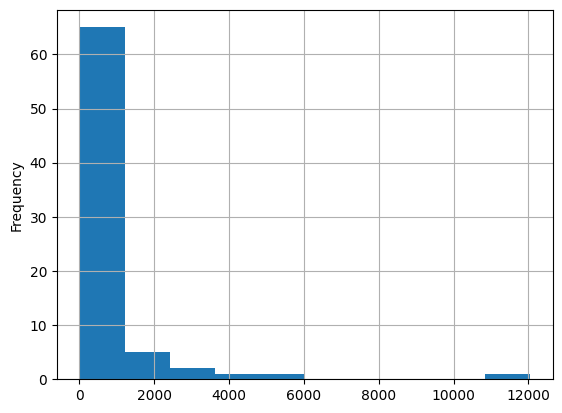

In [ ]:
df['engine_displacement_num'].value_counts(dropna=False).sort_values(ascending=False).plot.hist(grid=True, style='plotly')

In [ ]:
df['kilometrage_num'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
kilometrage_num,
0,89601
250000,4561
200000,3684
300000,3531
220000,3283
180000,3272
170000,3233
150000,3231


In [ ]:
df['datetime'].value_counts(dropna=False).sort_values(ascending=False)[:8]

,count
datetime,
2024-11-25 20:21:39.009696,7863
2024-12-05 20:22:31.547832,7714
2024-12-22 20:22:11.501464,7655
2024-11-21 20:21:21.748712,7576
2024-12-01 20:23:22.540779,7533
2024-09-29 20:44:31.452137+00,7519
2024-12-04 20:24:03.674423,7515
2024-11-12 20:21:01.478237,7469


In [ ]:
df['extra_info'].value_counts(dropna=False).sort_values(ascending=False)[:16]

,count
extra_info,
Yüngül lehimli disklər* ABS* Lyuk* Yağış sensoru* Mərkəzi qapanma* Park radarı* Kondisioner* Oturacaqların isidilməsi* Dəri salon* Ksenon lampalar* Arxa görüntü kamerası* Yan pərdələr* Oturacaqların ventilyasiyası,145259
Yüngül lehimli disklər* ABS* Lyuk* Yağış sensoru* Mərkəzi qapanma* Park radarı* Kondisioner* Oturacaqların isidilməsi* Dəri salon* Ksenon lampalar* Arxa görüntü kamerası* Oturacaqların ventilyasiyası,43677
Yüngül lehimli disklər* ABS* Lyuk* Yağış sensoru* Mərkəzi qapanma* Park radarı* Kondisioner* Oturacaqların isidilməsi* Dəri salon* Ksenon lampalar* Arxa görüntü kamerası,30562
Yüngül lehimli disklər* ABS* Yağış sensoru* Mərkəzi qapanma* Park radarı* Kondisioner* Oturacaqların isidilməsi* Dəri salon* Ksenon lampalar* Arxa görüntü kamerası* Yan pərdələr* Oturacaqların ventilyasiyası,26090
Yüngül lehimli disklər* ABS* Lyuk* Yağış sensoru* Mərkəzi qapanma* Park radarı* Kondisioner* Oturacaqların isidilməsi* Dəri salon* Ksenon lampalar* Arxa görüntü kamerası* Yan pərdələr,22446
Yüngül lehimli disklər* ABS* Yağış sensoru* Mərkəzi qapanma* Park radarı* Kondisioner* Ksenon lampalar* Arxa görüntü kamerası,11378
Yüngül lehimli disklər* ABS* Yağış sensoru* Mərkəzi qapanma* Park radarı* Kondisioner* Oturacaqların isidilməsi* Dəri salon* Ksenon lampalar* Arxa görüntü kamerası,10818
Yüngül lehimli disklər* ABS* Yağış sensoru* Mərkəzi qapanma* Park radarı* Kondisioner* Oturacaqların isidilməsi* Dəri salon* Ksenon lampalar* Arxa görüntü kamerası* Oturacaqların ventilyasiyası,9526
Yüngül lehimli disklər* ABS* Mərkəzi qapanma* Kondisioner,8606


# Cleaning

Data needs to be cleaned, and the main part is dealing with missing values. As mentioned in the "Column Visualization" part before, data will be imputed(in a `pandas` way) regarding to its meaning.

In [ ]:
df.city.value_counts()

,count
city,
bakı,60193
rayon,14978
sumqayıt,6025
gəncə,3420


In [ ]:
# columns to drop :
df.drop(columns=['spare_parts', 'vin', 'featured', 'shop_name', 'barter', 'vip', 'owner_name',\
                 'Yerlərin sayı', 'description', 'engine_displacement_unit',\
    'kilometrage_unit', 'phone', 'car_details_id_x', 'car_rel_url', 'views', 'car_details_id_y',\
                 'id_x', 'currency_x', 'price_x', 'datetime_product',\
    'day', 'hour', 'engine_displacement_num', 'kilometrage_num', 'img_url', 'id_y', 'cars_id', 'car_rel_url_y', 'datetime', 'car_rel_url_x',\
             'datetime_scrape', 'updated', 'Rəng', 'Yeni', 'name', 'attributes', 'Şəhər'], inplace=True
)

# in city column, 'baki', 'gence', 'sumqayit' correspond to ~98% of data. Labeled others with same name,
# so that data shape after preprocessing will drop down, and model predictions will be better because it will learn to generalize,
# given the huge number of data points that belong to same class.
df['city'] = df['city'].apply(lambda x: 'bakı' if x=='bakı' else 'sumqayıt' if x=='sumqayıt' else 'gəncə' if x=='gəncə' else 'rayon')

# 25-30 samples contained sm that belong to bikes, getting rid of that will help our model, model will see only one type of it.
df['Mühərrik'] = df[~(df['Mühərrik'].str.contains('sm'))]['Mühərrik']

# dropping null values in 'Mühərrik' column.
df.dropna(subset=['Mühərrik'], inplace=True)

# feature engineering of 'Mühərrik' column. Data in this column is like : hecm/at_gucu/yanacaq.
# these features need to be extracted.
df['muherrik_hecm'] = df['Mühərrik'].apply(lambda x: x.split('/')[0].split(' ')[0].strip())
df['muherrik_yanacaq'] = df['Mühərrik'].apply(lambda x: x.split('/')[-1].strip())

# Yurus column is numerical(in theory), but in this case it is object type because of string next to it (e.g. 200_000 km)
# feature engineering, splitting and pandas operations, apply, lambda, split, replace to make it numerical type.
df['Yürüş'] = df['Yürüş'].apply(lambda x: x.split(' km')[0].replace(' ', '')).astype(int)


# in 'extra_info' column, representation of different car specific accessories are extracted as individual features.
df['Yüngül lehimli disklər'] = df['extra_info'].apply(lambda x: 'He' if 'Yüngül lehimli disklər' in x.split('* ') else 'Yox')
df['ABS'] = df['extra_info'].apply(lambda x: 'He' if 'ABS' in x.split('* ') else 'Yox')
df['Lyuk'] = df['extra_info'].apply(lambda x: 'He' if 'Lyuk' in x.split('* ') else 'Yox')
df['Yağış sensoru'] = df['extra_info'].apply(lambda x: 'He' if 'Yağış sensoru' in x.split('* ') else 'Yox')
df['Mərkəzi qapanma'] = df['extra_info'].apply(lambda x: 'He' if 'Mərkəzi qapanma' in x.split('* ') else 'Yox')
df['Park radarı'] = df['extra_info'].apply(lambda x: 'He' if 'Park radarı' in x.split('* ') else 'Yox')
df['Kondisioner'] = df['extra_info'].apply(lambda x: 'He' if 'Kondisioner' in x.split('* ') else 'Yox')
df['Oturacaqların isidilməsi'] = df['extra_info'].apply(lambda x: 'He' if 'Oturacaqların isidilməsi' in x.split('* ') else 'Yox')
df['Dəri salon'] = df['extra_info'].apply(lambda x: 'He' if 'Dəri salon' in x.split('* ') else 'Yox')
df['Ksenon lampalar'] = df['extra_info'].apply(lambda x: 'He' if 'Ksenon lampalar' in x.split('* ') else 'Yox')
df['Arxa görüntü kamerası'] = df['extra_info'].apply(lambda x: 'He' if 'Arxa görüntü kamerası' in x.split('* ') else 'Yox')
df['Yan pərdələr'] = df['extra_info'].apply(lambda x: 'He' if 'Yan pərdələr' in x.split('* ') else 'Yox')
df['Oturacaqların ventilyasiyası'] = df['extra_info'].apply(lambda x: 'He' if 'Oturacaqların ventilyasiyası' in x.split('* ') else 'Yox')


# dropping columns after extracting needed features.
if 'extra_info' in df.columns:
  df.drop(columns=['extra_info'], inplace=True)

if 'Mühərrik' in df.columns:
  df.drop(columns=['Mühərrik'], inplace=True)

# not necessary, but makes column readable.
df['Sahiblər'] = df['Sahiblər'].replace('4 və daha çox', '4+')

# currency column has 3 different values: AZN, EUR, USD. Regarding conversions are made.
df['price'] = df[['currency_y', 'price_y']].apply(lambda row:  row['price_y']*1.7 if row['currency_y']=='USD' \
                                                  else row['price_y']*2 if row['currency_y']=='EUR' \
                                                  else row['price_y'], axis=1)

# needed features were extracted, after that, columns are dropped.
df.drop(columns=['price_y', 'currency_y', 'Buraxılış ili'], inplace=True)

# filling NaN values (pandas way)
df.loc[:, 'Qəzalı'].fillna(value='yox', inplace=True)
df.loc[:, 'Sahiblər'].fillna(value='1', inplace=True)
df.loc[:, 'Vəziyyəti'].fillna(value='Vuruğu yoxdur, rənglənməyib', inplace=True)
df.loc[:, 'loan'].fillna(value='yox', inplace=True)
df.loc[:, 'salon'].fillna(value='yox', inplace=True)
df.loc[:, 'Hansı bazar üçün yığılıb'].fillna(value='Rəsmi diler', inplace=True)



# list(df['Ban növü'].value_counts(normalize=True).sort_values(ascending=False).cumsum()[:8].index) --> Which types are mostly distributed(selected ~0.95)
# in below code.

df = df[(df['Ban növü']=='Sedan') | (df['Ban növü']=='Offroader / SUV, 5 qapı')\
| (df['Ban növü']=='Hetçbek, 5 qapı') | (df['Ban növü']=='Universal, 5 qapı')\
| (df['Ban növü']=='Liftbek') | (df['Ban növü']=='Furqon')\
| (df['Ban növü']=='Yük maşını') | (df['Ban növü']=='Minivan')]

# engine volume max can be ~6.5 in liters, but it will be an outlier, below code kind of implements percentile(0.99)
# muherrik_hecm column was object type
df['muherrik_hecm'] = pd.to_numeric(df['muherrik_hecm'])
df = df[df['muherrik_hecm']<6.5]


# Model column has ~1300 different values, Marka ~ 140 (most of them 1-20). One-Hot Encoding them will increase number of dimensions drastically.
# Instead, it would be favorable to choose the occurences that happen at least 51 times for Model column, and 21 times for Marka column,
# given that these counts make up a little amount and bring outliers with them(could affect model negatively).
# Below code does that.

a = df['Model'].value_counts().to_frame()[(df['Model'].value_counts()>50)].index.to_list()
b = df['Model'].apply(lambda x: x if x in a else -1)
df = df[b != (-1)]


a = df['Marka'].value_counts().to_frame()[df['Marka'].value_counts()>20].index.to_list()
b = df['Marka'].apply(lambda x: x if x in a else -1)
df = df[b != (-1)]



<ipython-input-366-ec2f5554b9f9>:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:, 'Qəzalı'].fillna(value='yox', inplace=True)
<ipython-input-366-ec2f5554b9f9>:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
df.shape

(74237, 30)

# Last Check

In [ ]:
for col in df.columns:
  print(col, '  ', df[col].value_counts().shape[0])

city    4
production_year    53
loan    2
salon    2
Ban növü    8
Hansı bazar üçün yığılıb    9
Marka    35
Model    212
Qəzalı    2
Sahiblər    5
Sürətlər qutusu    5
Vəziyyəti    4
Yürüş    18415
Ötürücü    3
muherrik_hecm    53
muherrik_yanacaq    6
Yüngül lehimli disklər    2
ABS    2
Lyuk    2
Yağış sensoru    2
Mərkəzi qapanma    2
Park radarı    2
Kondisioner    2
Oturacaqların isidilməsi    2
Dəri salon    2
Ksenon lampalar    2
Arxa görüntü kamerası    2
Yan pərdələr    2
Oturacaqların ventilyasiyası    2
price    2764


In [ ]:
(df['Model'].value_counts()>100).sum()

144

In [ ]:
(df['Model'].value_counts(normalize=True).sort_values().cumsum()>0.20).sum()

76

<Axes: xlabel='Model'>

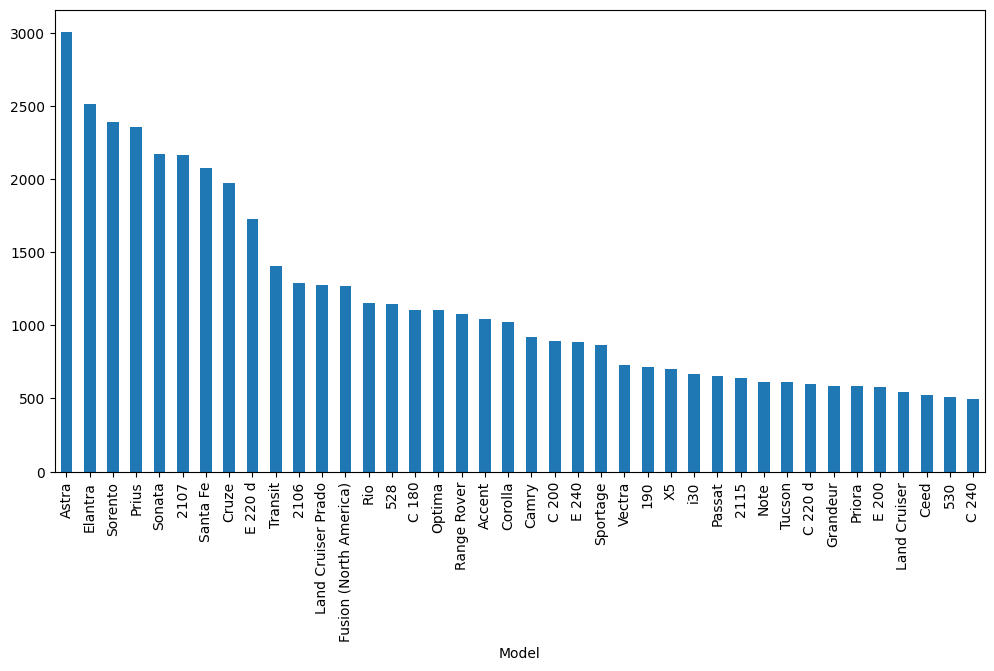

In [ ]:
df['Model'].value_counts().sort_values(ascending=False)[:40].plot.bar(figsize=(12, 6))

In [ ]:
df.shape

(74237, 30)

In [ ]:
df.columns

Index(['city', 'production_year', 'loan', 'salon', 'Ban növü',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Qəzalı', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yürüş', 'Ötürücü', 'muherrik_hecm',
       'muherrik_yanacaq', 'Yüngül lehimli disklər', 'ABS', 'Lyuk',
       'Yağış sensoru', 'Mərkəzi qapanma', 'Park radarı', 'Kondisioner',
       'Oturacaqların isidilməsi', 'Dəri salon', 'Ksenon lampalar',
       'Arxa görüntü kamerası', 'Yan pərdələr', 'Oturacaqların ventilyasiyası',
       'price'],
      dtype='object')

In [ ]:
list(df['Ban növü'].value_counts(normalize=True).sort_values(ascending=False).cumsum()[:8].index)

# This is the list of mostly distributed (~95%) vehicle types. Removing the outliers will enhance the performance.

['Sedan',
 'Offroader / SUV, 5 qapı',
 'Hetçbek, 5 qapı',
 'Universal, 5 qapı',
 'Liftbek',
 'Furqon',
 'Minivan',
 'Yük maşını']

In [ ]:
df.isna().sum()

,0
city,0
production_year,0
loan,0
salon,0
Ban növü,0
Hansı bazar üçün yığılıb,0
Marka,0
Model,0
Qəzalı,0
Sahiblər,0


# Model preparation

In [ ]:
# data and labels

X = df.drop('price', axis=1)
y = df['price']

Train-Test scores and model evaluation 



LightGBMRegressor 




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 51965, number of used features: 325
[LightGBM] [Info] Start training from score 23131.726221


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBMRegressor R^2 score on test data: 0.9497361812936905 

LightGBMRegressor MSE: 39527596.607185476 

LightGBMRegressor RMSE: 6287.097629843637 



Visualization of 20 most important features for LightGBMRegressor: 





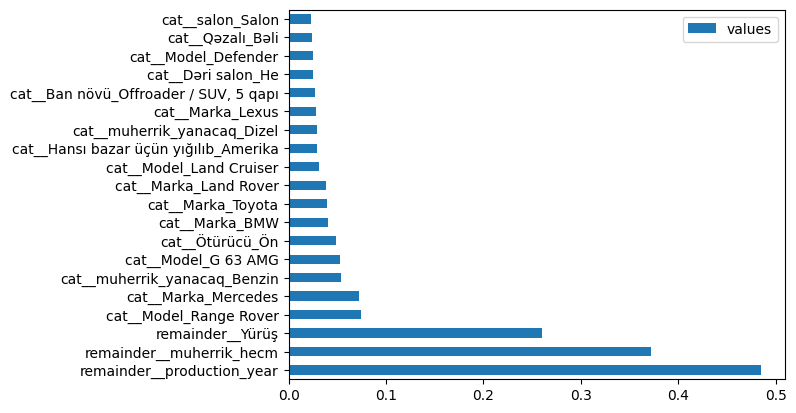






Decision Tree Regressor 


Decision Tree Regressor R^2 score on test data: 0.9259587629447256 

Decision Tree Regressor MSE: 58226219.693302155 

Decision Tree Regressor RMSE: 7630.610702512752 



Visualization of 20 most important features for Decision Tree Regressor: 





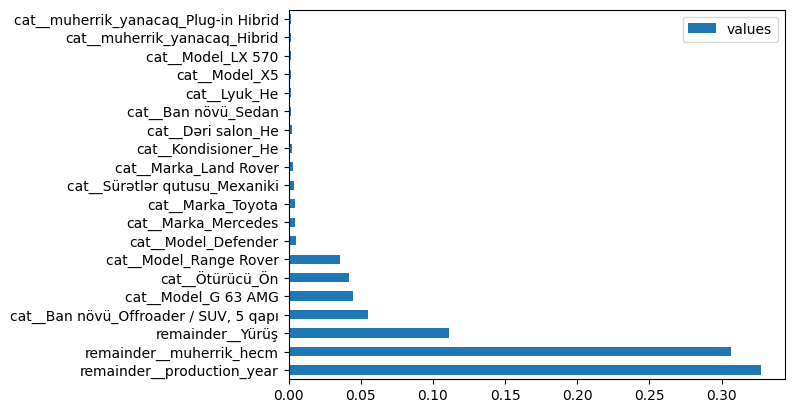






Random Forest Regressor 


Random Forest Regressor R^2 score on test data: 0.9557668794808833 

Random Forest Regressor MSE: 34785040.006066754 

Random Forest Regressor RMSE: 5897.884366963018 



Visualization of 20 most important features for Random Forest Regressor: 





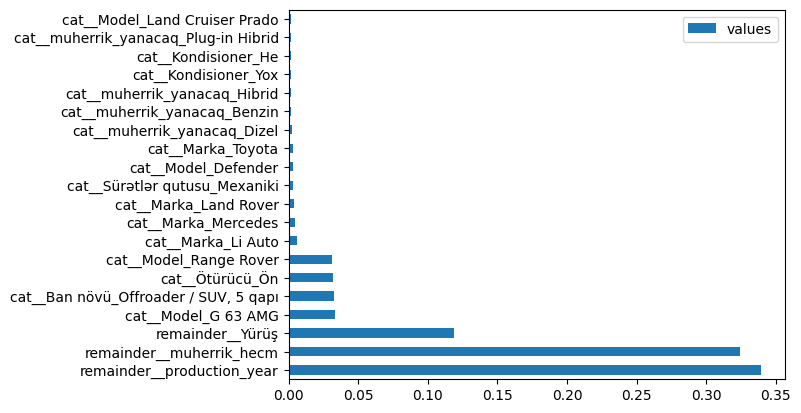






Linear Regression 


Linear Regression R^2 score on test data: 0.7985373902395821 

Linear Regression MSE: 158430715.67184803 

Linear Regression RMSE: 12586.92637905887
Which features have a strong impact on the output of trained Linear Regression method:  



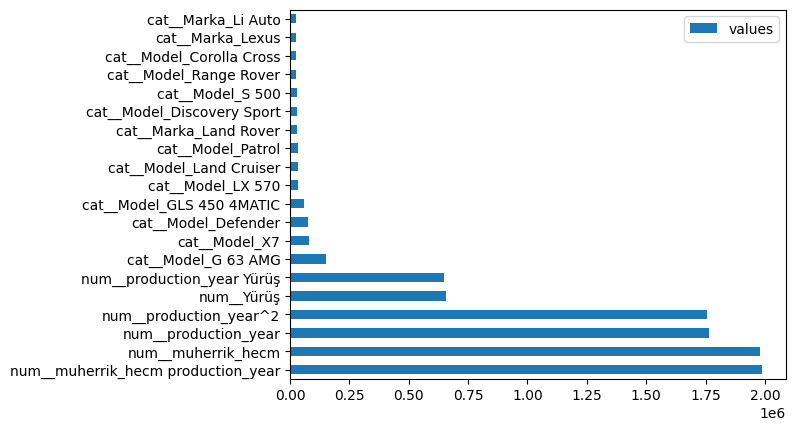

In [ ]:
# importing needed libraries
from sklearn.model_selection import train_test_split   # train-test
from sklearn.pipeline import Pipeline   # pipeline
from sklearn.compose import ColumnTransformer   # ColumnTransformer (making data ready to go into a model)
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures   # preprocessing steps for numerical and categorical data
from sklearn.linear_model import LinearRegression   # base model 2
from sklearn.tree import DecisionTreeRegressor   # base model 1
from sklearn.ensemble import RandomForestRegressor   # stronger ensemble model
from sklearn.metrics import r2_score, mean_squared_error   # metrics (R^2 and mean squared error, at following lines I will introduce root mean squared error)
from lightgbm import LGBMRegressor


# all columns.
cols = X.columns

# numerical and categorical columns.
num_cols = ['muherrik_hecm', 'production_year', 'Yürüş']
cat_cols = list(set(X.columns).difference(set(num_cols)))



# using PolynomialFeatures in a pipeline with second degree and without bias.
num_pipe_lin_reg = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler())
    ]
)



# ColumnTransformer instance. Specifying pipeline and columns for linear regression model.
ct = ColumnTransformer(
    [
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols),
        ('num', num_pipe_lin_reg, num_cols)
    ]
)


# ColumnTransformer for tree based models
ct_tree = ColumnTransformer(
    [
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
    ], remainder='passthrough'
)
# Tree based models do not need scaling of numerical data.


# train-test splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# specifying (preprocessing + model) steps in pipelines
ct_dtr = Pipeline(
    [
        ('ct', ct_tree),
        ('model', DecisionTreeRegressor())
    ]
)

ct_rfr = Pipeline(
    [
        ('ct', ct_tree),
        ('model', RandomForestRegressor(n_jobs=-1))
    ]
)



ct_lin_reg = Pipeline(
    [
        ('ct', ct),
        ('model', LinearRegression())
    ]
)


ct_lgbm_reg = Pipeline(
    [
        ('ct', ct_tree),
        ('model', LGBMRegressor(n_jobs=-1))
    ]
)





# making a dict will be useful, they all will be used the same way (fitting, predicting, scoring)
name_model_dict = {
    'LightGBMRegressor': ct_lgbm_reg,
    'Decision Tree Regressor': ct_dtr,
    'Random Forest Regressor': ct_rfr,
    'Linear Regression': ct_lin_reg
              }



print('Train-Test scores and model evaluation', '\n'*3)

# evaluating the model scores: R^2, MSE, RMSE, and plotting 10 most important features for each model.
# For tree based models, feature importances are a representation of splitting criteria of the data. Meaning that higher the value of a feature importance,
# better the importance of splitting criteria.

for name, model in name_model_dict.items():   # iterating through the dictionary that was introduced above
  if name != 'Linear Regression':
    print(name, '\n'*2)
    model.fit(X_train, y_train)   # fitting
    model_mse = mean_squared_error(y_test, model.predict(X_test))  # Mean Squared Error
    print(f'{name} R^2 score on test data: {model.score(X_test, y_test)}', '\n')   # model.score() returns R^2 score as default for regression.
    print(f'{name} MSE: {model_mse}', '\n')
    print(f'{name} RMSE: {np.sqrt(model_mse)}', '\n'*3)   # RMSE = MSE**0.5
    print(f'Visualization of 20 most important features for {name}:', '\n'*3)
    feat_ = model.steps[0][1].get_feature_names_out()
    # pipeline.steps returns 2 objects,
    # each having a string name and object. Index accessing will return their methods and attributes.

    if name == 'LightGBMRegressor':
      imp_ = model.steps[1][1].feature_importances_ / 1_000  # LGBMRegressor gives 1_000 times greater than its original value
    else:
      imp_ = model.steps[1][1].feature_importances_

    # Creating DataFrame to plot
    data = pd.DataFrame(index=feat_, data=imp_, columns=['values']).sort_values(by='values', ascending=False).head(20)
    data.plot.barh()
    plt.show()
    print('\n'*4)


  else:
    print(name, '\n'*2)
    model.fit(X_train, y_train)
    model_mse = mean_squared_error(y_test, model.predict(X_test))
    print(f'{name} R^2 score on test data: {model.score(X_test, y_test)}', '\n')
    print(f'{name} MSE: {model_mse}', '\n')
    print(f'{name} RMSE: {np.sqrt(model_mse)}')
    feat_ = model.steps[0][1].get_feature_names_out()
    imp_ = np.abs(model.steps[1][1].coef_)
    # For Linear Regression, feature importance can be thought as columns
    # that have the largest coefficient (naturally, they will have greater contribution to the output number),
    # given that they are in the same scale.

    print('Which features have a strong impact on the output of trained Linear Regression method: ', '\n')
    data = pd.DataFrame(index=feat_, data=imp_, columns=['values']).sort_values(by='values', ascending=False).head(20)
    data.plot.barh()
    plt.show()





## Which models were used and why

I used Regression models for this task, namely:
\
\
Linear, Decision Tree, LightGBM, and Random Forest.
\
\
Linear ---> Simple to interpret, intuitive, time complexity is okay, if there's a need for non-linear relationships, polynomial features can be introduced, provides a little flexibility.
\
\
Decision Tree ---> Time complexity is okay, can obtain feature_importances, does not need scaling of numerical data, can understand complex relationships.
\
\
\
LightGBM ---> Uses Gradient Boosting algorithm(each tree minimizes the error of the previous tree), **FAST**, so many hyperparameters
\
      following comes from Decision Trees as a base model: can obtain feature_importances, does not need scaling of numerical data, can understand complex relationships
\
\
\
Random Forest ---> Best model so far. Uses Bagging, base estimators are Decision Trees, against overfitting, scalable,
\
      following comes from Decision Trees as a base model: can obtain feature_importances, does not need scaling of numerical data, can understand complex relationships


# Cross - Validation

In [ ]:
# importing libraries for cross_val
from sklearn.model_selection import cross_validate


print('Cross Validation', '\n', '3 Fold Cross Validation', '\n'*3)

# cross validation
for name, model in name_model_dict.items():
  print(name, '\n')
  cross_val = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=['r2', 'neg_root_mean_squared_error'])
  print(f'cross validation scores: {cross_val}', '\n'*3)

Cross Validation 
 3 Fold Cross Validation 



LightGBMRegressor 

cross validation scores: {'fit_time': array([7.2353425 , 6.41520643, 1.7558248 ]), 'score_time': array([0.61951947, 0.64321256, 0.39065886]), 'test_r2': array([0.96106842, 0.95589656, 0.95486048]), 'test_neg_root_mean_squared_error': array([-5111.16067712, -5317.43970812, -5533.88263837])} 



Decision Tree Regressor 

cross validation scores: {'fit_time': array([4.74254608, 4.70814967, 3.78527021]), 'score_time': array([0.4446528 , 0.437567  , 0.27348828]), 'test_r2': array([0.92423773, 0.93888582, 0.92495232]), 'test_neg_root_mean_squared_error': array([-7130.0900902 , -6259.46623115, -7135.42923931])} 



Random Forest Regressor 

cross validation scores: {'fit_time': array([324.3041842 , 323.59752417, 157.20605731]), 'score_time': array([2.92317915, 2.8986721 , 1.28478241]), 'test_r2': array([0.96257245, 0.96150875, 0.9600716 ]), 'test_neg_root_mean_squared_error': array([-5011.4598732 , -4967.60810493, -5204.660825

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


cross validation scores: {'fit_time': array([3.09998846, 4.18045998, 4.83245373]), 'score_time': array([0.40438366, 0.76088262, 0.3947351 ]), 'test_r2': array([0.79894583, 0.82388259, 0.81629634]), 'test_neg_root_mean_squared_error': array([-11615.1567183 , -10625.94264193, -11163.75684091])} 





## Used metrics and their meaning

Used metrics:
\
R^2, neg_root_mean_squared_error
\
\
R^2 - - - -> Shows how close the predicted values are to the actual values
\
1 - - great
\
0 - - bad
\
less than 0 - -very bad
\
\
'neg_root_mean_squared_error' shows negative value of root mean squared error
\
\
root mean squared error = ( 1 / N ) * ( y ( predicted ) - y ( actual ) ) ^ 2

# Hyperparameter - tuning



In [ ]:
from sklearn.model_selection import GridSearchCV

params_random_forest = {
    'model__n_jobs': [-1],
    'model__n_estimators': [100, 200],
    'model__min_samples_split': [2, 10],
    'model__max_depth': [50, 100, None],
    'model__max_features': ['sqrt', 'log2']
}

params_lgbm = {
    'model__learning_rate': [0.01, 0.1],
    'model__n_estimators': [100, 200],
    'model__max_depth': [-1, 5, 10],
    'model__min_child_samples': [10, 20],
    'model__subsample': [0.8, 1.0],
    'model__n_jobs': [-1]
}

grid_search_lgbm = GridSearchCV(estimator=ct_lgbm_reg,
                           param_grid=params_lgbm,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_root_mean_squared_error')


grid_search_random_forest = GridSearchCV(estimator=ct_rfr,
                           param_grid=params_random_forest,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_root_mean_squared_error')



grid_search_lgbm.fit(X_train, y_train)
print('LightGBMRegressor best params given the param_grid by GridSearchCV:', '\n', grid_search_lgbm.best_params_, '\n'*4)
print('LightGBMRegressor best score on test data given the param_grid by GridSearchCV:', '\n', grid_search_lgbm.score(X_test, y_test), '\n'*4)

grid_search_random_forest.fit(X_train, y_train)
print('Random Forest Regressor best params given the param_grid by GridSearchCV:', '\n', grid_search_random_forest.best_params_, '\n'*4)
print('Random Forest Regressor best score on test data given the param_grid by GridSearchCV:', '\n',grid_search_random_forest.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 51965, number of used features: 325
[LightGBM] [Info] Start training from score 23131.726221
LightGBMRegressor best params given the param_grid by GridSearchCV: 
 {'model__learning_rate': 0.1, 'model__max_depth': -1, 'model__min_child_samples': 20, 'model__n_estimators': 200, 'model__n_jobs': -1, 'model__subsample': 0.8} 






/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBMRegressor best score on test data given the param_grid by GridSearchCV: 
 -6016.075903416279 






/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Regressor best params given the param_grid by GridSearchCV: 
 {'model__max_depth': 100, 'model__max_features': 'sqrt', 'model__min_samples_split': 2, 'model__n_estimators': 200, 'model__n_jobs': -1} 




Random Forest Regressor best score on test data given the param_grid by GridSearchCV: 
 -7330.247891349211


## Tuned hyperparameters and their meaning

**Random Forest**
\
\
\
\
'model__n_jobs' - - - - - > use all available cpu cores.
\
\
\
'model__n_estimators': - - - - - > number of estimators.
\
Increasing can yield better results, but it can overfit.
\
\
\
'model__min_samples_split':  - - - - - > How many sample required in a leaf to perform a split.
\
Decreasing it can result in overfitting.
\
\
\
'model__max_depth': - - - - - > Tree depth of model
\
Increasing it can lead to overfitting.
\
\
\
'model__max_features':  - - - - - > number of features to train base estimators (weak learners).
\
Increasing may give better results, but there is a risk of overfitting.

\
\
\
\
\
\
**LightGBM**
\
\
\
\
'model__learning_rate' - - - - - > learning rate for optimization algorithm.
\
Decreasing it can make model slower, but convergence will be guaranteed.
\
\
\
'model__n_estimators' - - - - - > number of estimators.
\
Increasing can yield better results, but it can overfit.
\
\
\
'model__max_depth' - - - - - > max tree depth.
\
Increasing it can lead to overfitting.
\
\
\
'model__min_child_samples' - - - - - > minimum data points in a leaf for splitting.
\
Decreasing it can result in overfitting.
\
\
\
'model__subsample' - - - - - > what percent of data to use (between 0 and 1).
\
Decreasing it (not too much) can make our model's generalization's better.
\
\
\
\
'model__n_jobs' - - - - - > use all available cpu cores.